# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC

df = pd.read_csv('demo01_apropriado.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   sexo                                      16650 non-null  object 
 1   posse_de_veiculo                          16650 non-null  object 
 2   posse_de_imovel                           16650 non-null  object 
 3   qtd_filhos                                16650 non-null  int64  
 4   idade                                     16650 non-null  float64
 5   tempo_emprego                             16650 non-null  float64
 6   possui_celular                            16650 non-null  int64  
 7   possui_fone_comercial                     16650 non-null  int64  
 8   possui_fone                               16650 non-null  int64  
 9   possui_email                              16650 non-null  int64  
 10  qt_pessoas_residencia             

In [3]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [4]:
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[['sexo', 'posse_de_veiculo', 'posse_de_imovel']])

X = np.hstack([X_encoded, df[['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular']]])
y = df['mau']

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X, y)


DecisionTreeClassifier()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

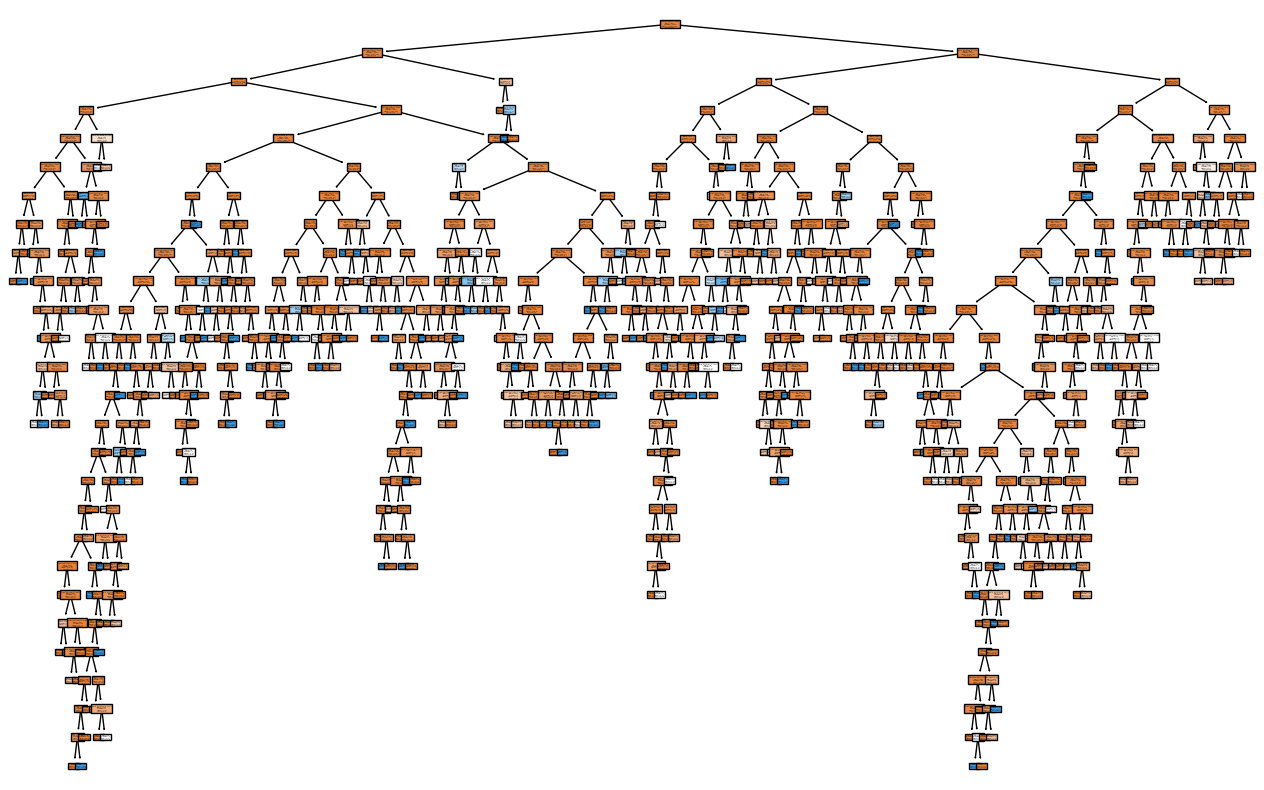

In [7]:
clf_dt.fit(X_train, y_train)

encoded_feature_names = encoder.get_feature_names_out(['sexo', 'posse_de_veiculo', 'posse_de_imovel'])
all_feature_names = list(encoded_feature_names) + ['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular']

plt.figure(figsize=(16, 10))
plot_tree(clf_dt, filled=True, feature_names=all_feature_names, class_names=['Bom', 'Mau'])
plt.show()

<Figure size 800x600 with 0 Axes>

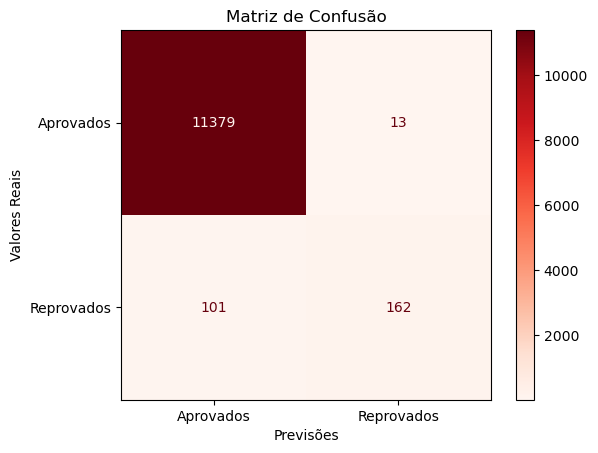

In [8]:
y_pred2 = clf_dt.predict(X_train)

cm2 = confusion_matrix(y_train, y_pred2)

class_names = ['Aprovados', 'Reprovados']

cm2_display = ConfusionMatrixDisplay(cm2, display_labels=class_names)

plt.figure(figsize=(8, 6))
cm2_display.plot(cmap=plt.cm.Reds, values_format='d')

plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

In [9]:
y_train_pred = clf_dt.predict(X_train)

In [10]:
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {accuracy_train:.2f}')

Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
y_test_pred = clf_dt.predict(X_test)

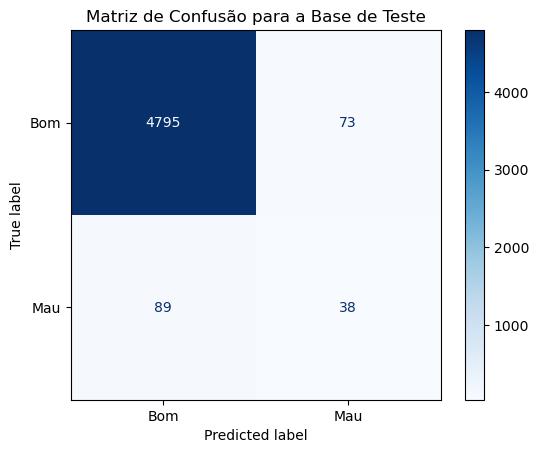

In [12]:
cm_test = confusion_matrix(y_test, y_test_pred)

cm_test_display = ConfusionMatrixDisplay(cm_test, display_labels=['Bom', 'Mau']).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão para a Base de Teste")
plt.show()


In [13]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia da Base de Teste: {accuracy_test:.2f}')

Acurácia da Base de Teste: 0.97


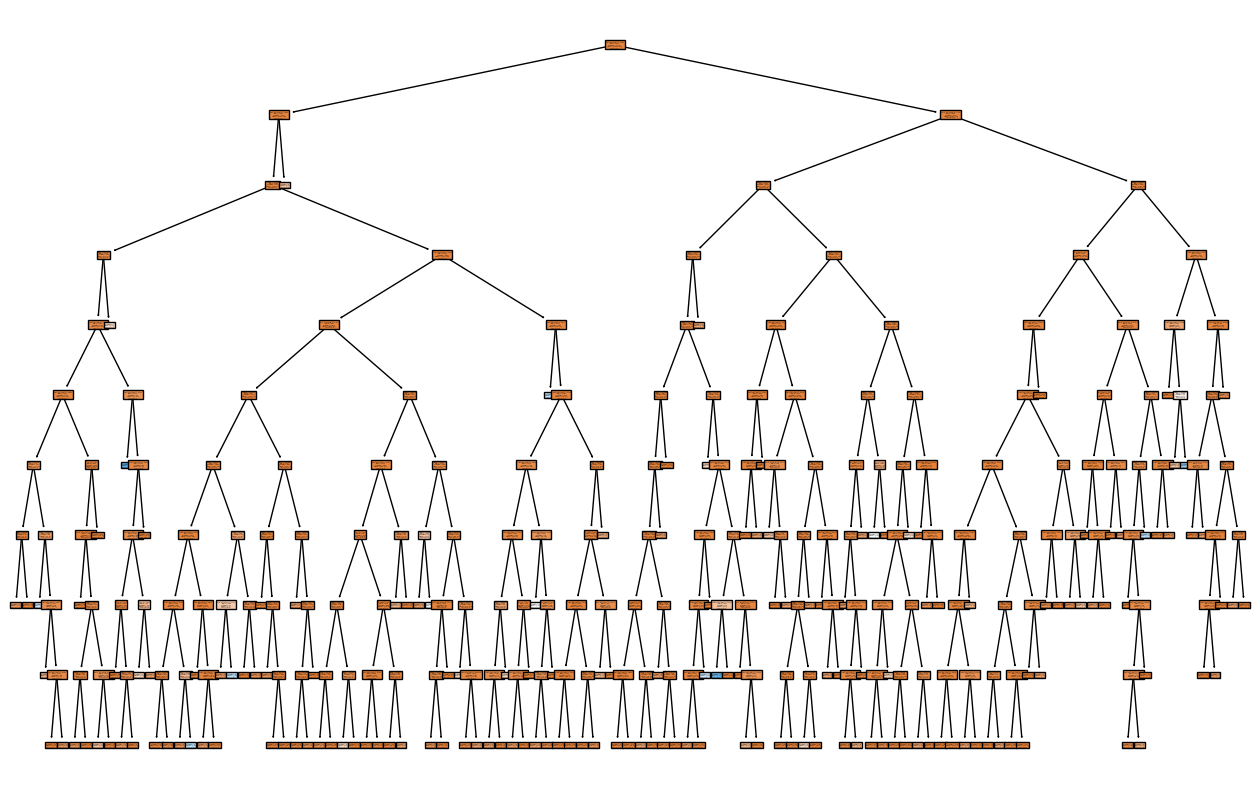

In [14]:
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new.fit(X_train, y_train)

y_test_pred_new = clf_new.predict(X_test)

encoded_feature_names = encoder.get_feature_names_out(['sexo', 'posse_de_veiculo', 'posse_de_imovel'])
all_feature_names = list(encoded_feature_names) + ['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular']

plt.figure(figsize=(16, 10))
plot_tree(clf_new, filled=True, feature_names=all_feature_names, class_names=['Bom', 'Mau'])
plt.show()

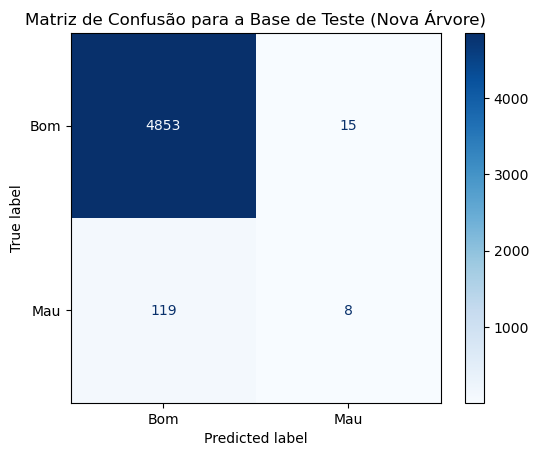

In [15]:
cm_test_new = confusion_matrix(y_test, y_test_pred_new)

cm_test_new_display = ConfusionMatrixDisplay(cm_test_new, display_labels=['Bom', 'Mau']).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão para a Base de Teste (Nova Árvore)")
plt.show()

In [16]:
accuracy_test_new = accuracy_score(y_test, y_test_pred_new)
print(f'Acurácia da Base de Teste (Nova Árvore): {accuracy_test_new:.2f}')

Acurácia da Base de Teste (Nova Árvore): 0.97


In [17]:
proporcao_maus = cm_test_new[1, 1] / (cm_test_new[1, 0] + cm_test_new[1, 1])
print(f'Proporção de Proponentes Classificados como \'Maus\': {proporcao_maus:.2f}')

Proporção de Proponentes Classificados como 'Maus': 0.06


In [18]:
y_test_pred_todos_bons = ['Bom'] * len(y_test)

accuracy_todos_bons = accuracy_score(y_test, y_test_pred_todos_bons)
print(f'Acurácia se Todos os Contratos Fossem Classificados como \'Bons\': {accuracy_todos_bons:.2f}')

Acurácia se Todos os Contratos Fossem Classificados como 'Bons': 0.00


/Users/diegolima/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
